In [7]:
# import libraries and modules

import torch

from setup import *

from axis_angle import *

from axis_angle_analysis import *

In [8]:
# Set the cuda device 

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


# 1. TEAPOT

## Teapot (convergence)

In [9]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


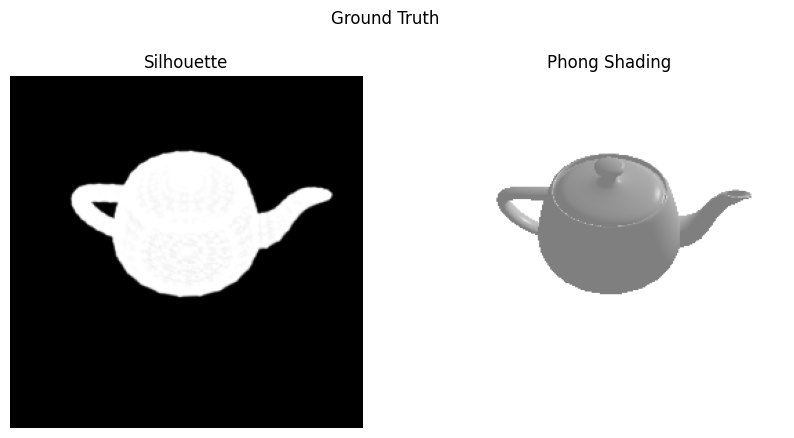

In [10]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 50,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

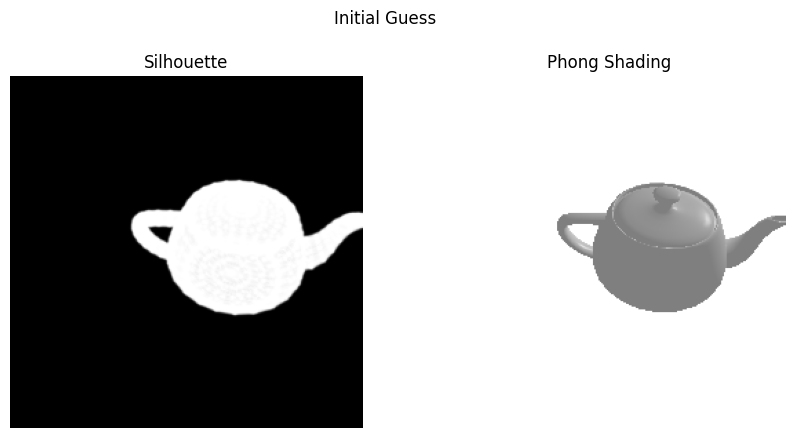

In [11]:
variances = {
    "dist": 1,
    "elev": 30,
    "azim": 30
}

# # Initial guess for R and T
# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)

# # # save R and T to a file
# np.save("data/teapot_R_init_1.npy", R_init.cpu().numpy())
# np.save("data/teapot_T_init_1.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/teapot_R_init_1.npy")).to(device)
T_init = torch.tensor(np.load("data/teapot_T_init_1.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)



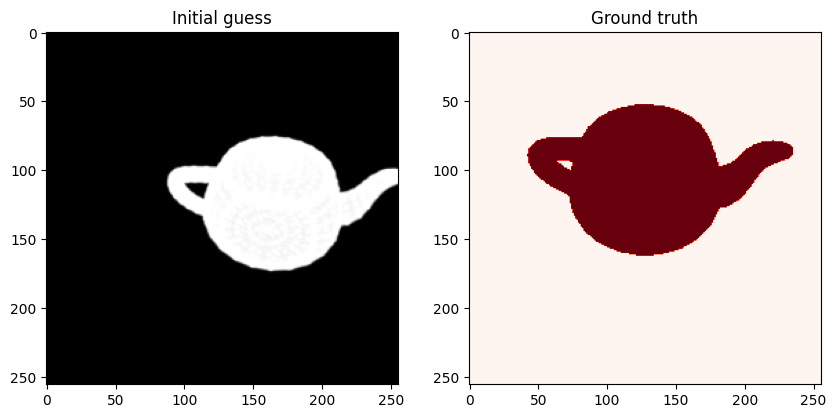

  0%|          | 0/30 [00:09<?, ?it/s]

iteration: 0, loss: 9240.580078125


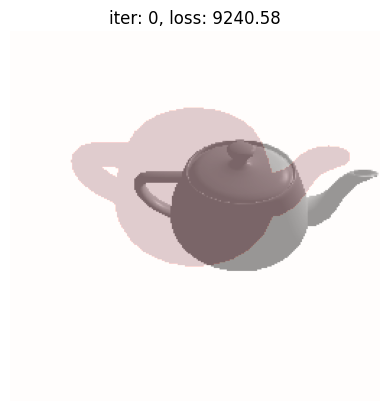

  7%|▋         | 2/30 [00:19<04:35,  9.83s/it]

iteration: 1, loss: 8123.05859375


 10%|█         | 3/30 [00:29<04:20,  9.64s/it]

iteration: 2, loss: 6853.8984375


 13%|█▎        | 4/30 [00:38<04:07,  9.51s/it]

iteration: 3, loss: 5181.017578125


 17%|█▋        | 5/30 [00:47<03:53,  9.33s/it]

iteration: 4, loss: 4604.28271484375


 17%|█▋        | 5/30 [00:56<03:53,  9.33s/it]

iteration: 5, loss: 4892.4892578125


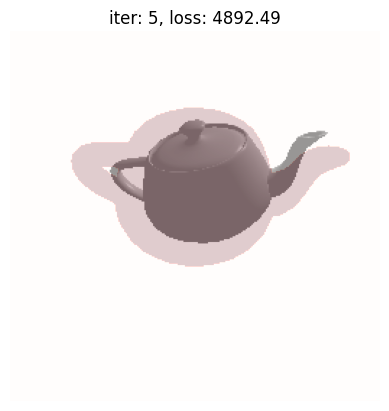

 23%|██▎       | 7/30 [01:06<03:32,  9.26s/it]

iteration: 6, loss: 5032.43701171875


 27%|██▋       | 8/30 [01:15<03:27,  9.42s/it]

iteration: 7, loss: 4988.19189453125


 30%|███       | 9/30 [01:25<03:20,  9.53s/it]

iteration: 8, loss: 4782.48486328125


 33%|███▎      | 10/30 [01:35<03:13,  9.68s/it]

iteration: 9, loss: 4506.4541015625


 33%|███▎      | 10/30 [01:46<03:13,  9.68s/it]

iteration: 10, loss: 4129.5849609375


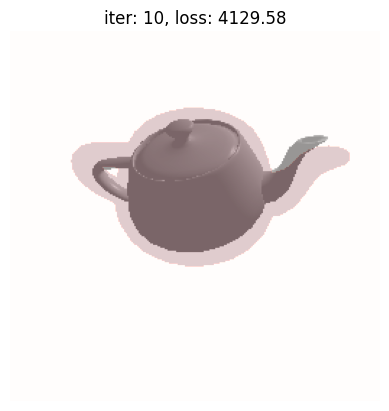

 40%|████      | 12/30 [01:58<03:08, 10.48s/it]

iteration: 11, loss: 3622.80078125


 43%|████▎     | 13/30 [02:09<03:04, 10.83s/it]

iteration: 12, loss: 2935.98291015625


 47%|████▋     | 14/30 [02:22<03:01, 11.32s/it]

iteration: 13, loss: 2053.30810546875


 50%|█████     | 15/30 [02:34<02:53, 11.60s/it]

iteration: 14, loss: 1935.192626953125


 50%|█████     | 15/30 [02:46<02:53, 11.60s/it]

iteration: 15, loss: 2059.10986328125


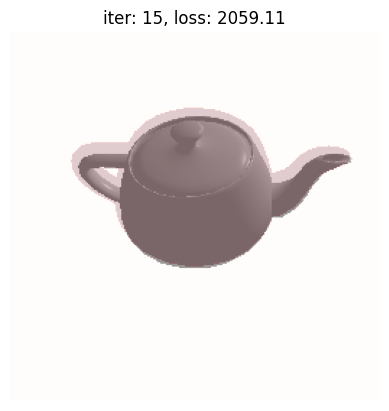

 57%|█████▋    | 17/30 [02:59<02:38, 12.16s/it]

iteration: 16, loss: 1431.896484375


 60%|██████    | 18/30 [03:13<02:30, 12.55s/it]

iteration: 17, loss: 509.91485595703125


 63%|██████▎   | 19/30 [03:27<02:22, 13.00s/it]

iteration: 18, loss: 1114.1309814453125


 67%|██████▋   | 20/30 [03:42<02:16, 13.61s/it]

iteration: 19, loss: 1650.5594482421875


 67%|██████▋   | 20/30 [03:58<02:16, 13.61s/it]

iteration: 20, loss: 1568.1524658203125


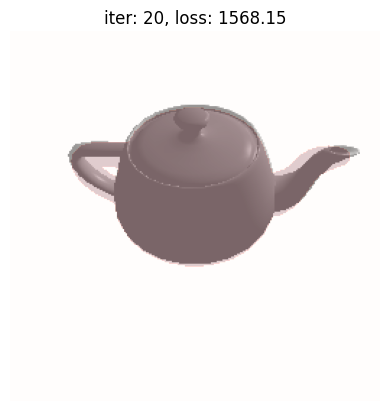

 73%|███████▎  | 22/30 [04:15<02:01, 15.14s/it]

iteration: 21, loss: 1204.8092041015625


 77%|███████▋  | 23/30 [04:32<01:49, 15.65s/it]

iteration: 22, loss: 1216.5980224609375


 80%|████████  | 24/30 [04:49<01:36, 16.16s/it]

iteration: 23, loss: 1045.2562255859375


 83%|████████▎ | 25/30 [05:06<01:21, 16.29s/it]

iteration: 24, loss: 798.950927734375


 83%|████████▎ | 25/30 [05:22<01:21, 16.29s/it]

iteration: 25, loss: 587.081298828125


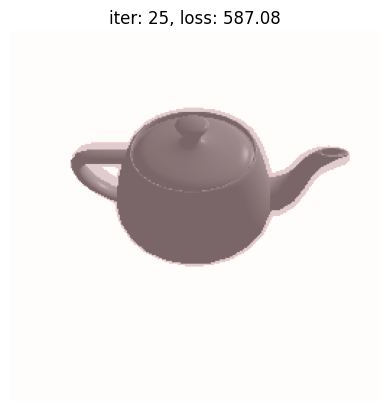

 90%|█████████ | 27/30 [05:38<00:48, 16.08s/it]

iteration: 26, loss: 520.3206787109375


 93%|█████████▎| 28/30 [05:53<00:31, 15.69s/it]

iteration: 27, loss: 602.80517578125


 97%|█████████▋| 29/30 [06:07<00:15, 15.29s/it]

iteration: 28, loss: 784.0463256835938


100%|██████████| 30/30 [06:21<00:00, 12.73s/it]


iteration: 29, loss: 864.0404052734375


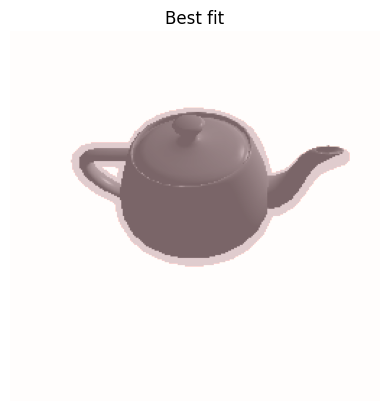

In [12]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 30, device)

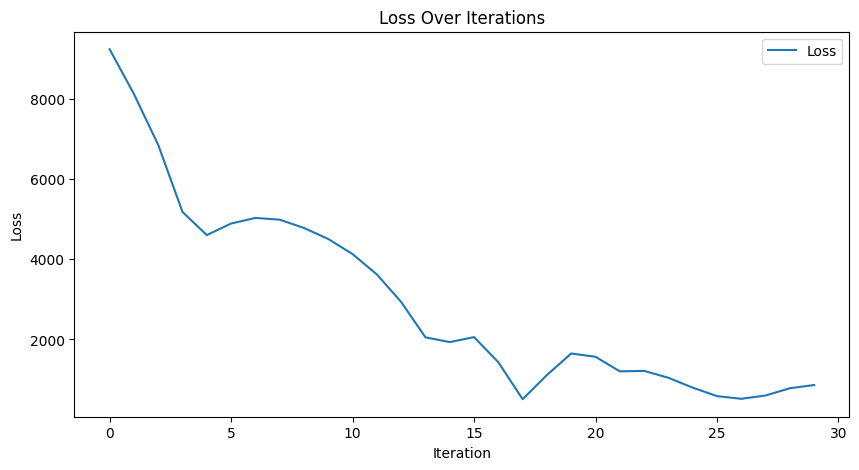

In [13]:
plot_losses(losses)

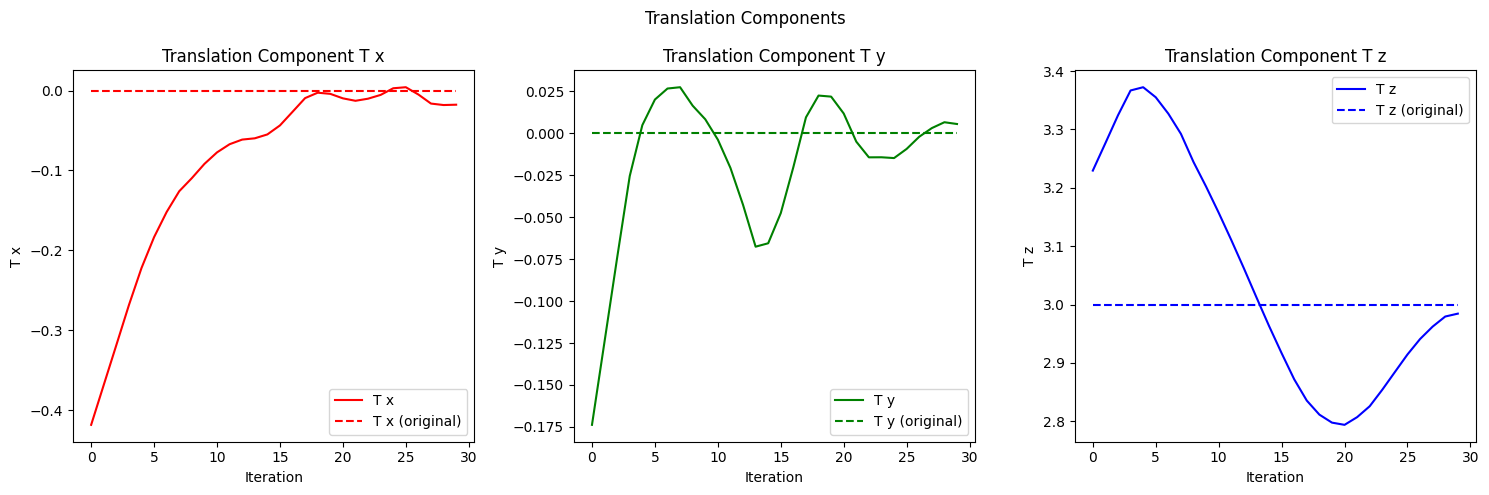

In [14]:
plot_translations(T_gt, parameter_updates)

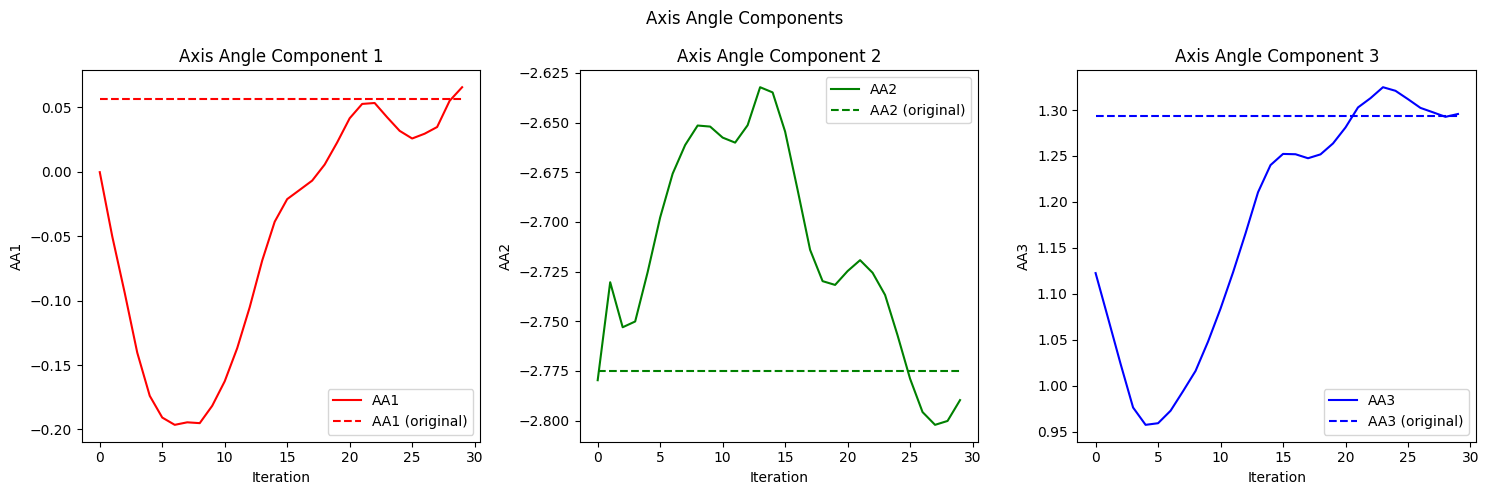

In [15]:
plot_axis_angles(R_gt, parameter_updates)

## Teapot (Another initialisation)

In [20]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
obj_name = obj_name + "_1"
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot_1


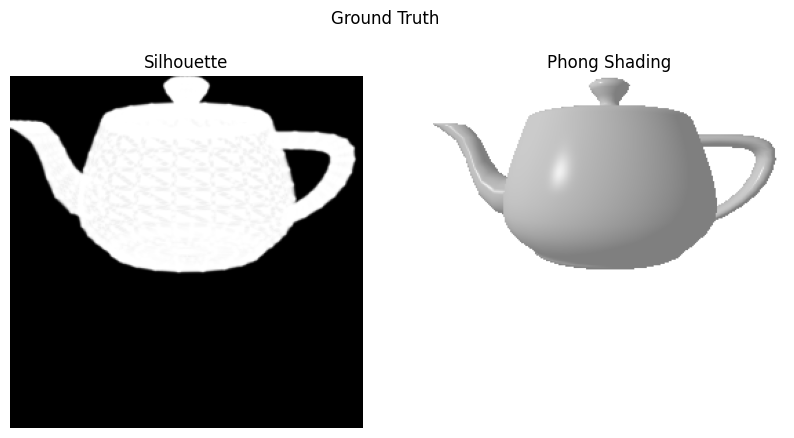

In [21]:
# Ground truth parameters

params = {
    "dist": -2,
    "elev": -15,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

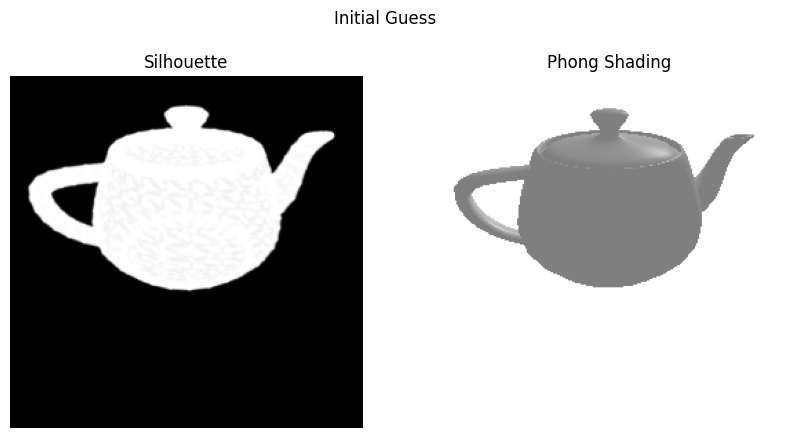

In [22]:
variances = {
    "dist": 2,
    "elev": 30,
    "azim": 30
}

# # Initial guess for R and T
# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.5, device=device)

# # save R and T to a file
# np.save("data/teapot_R_init_2.npy", R_init.cpu().numpy())
# np.save("data/teapot_T_init_2.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/teapot_R_init_2.npy")).to(device)
T_init = torch.tensor(np.load("data/teapot_T_init_2.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

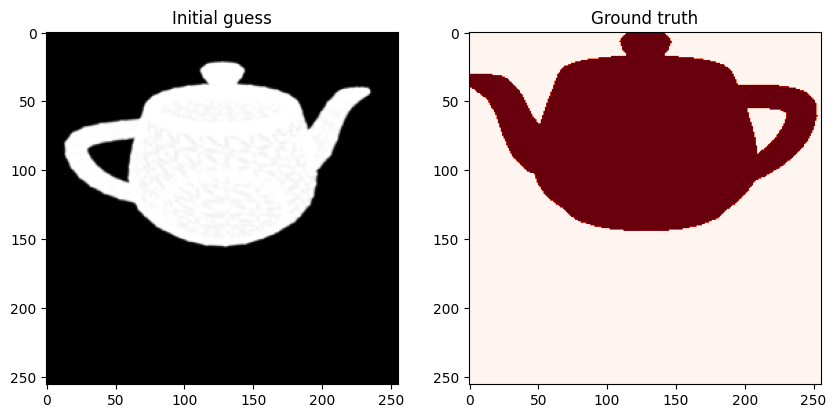

  0%|          | 0/25 [00:12<?, ?it/s]

iteration: 0, loss: 8822.373046875


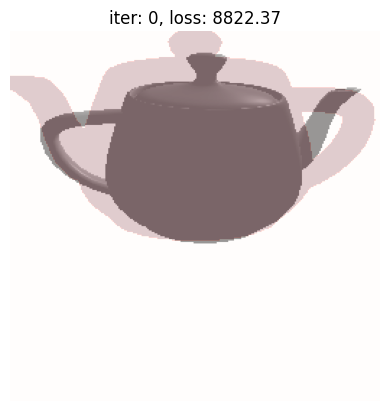

  8%|▊         | 2/25 [00:26<05:03, 13.18s/it]

iteration: 1, loss: 6862.85302734375


 12%|█▏        | 3/25 [00:39<04:54, 13.38s/it]

iteration: 2, loss: 6638.513671875


 16%|█▌        | 4/25 [00:54<04:47, 13.68s/it]

iteration: 3, loss: 6316.52734375


 20%|██        | 5/25 [01:08<04:38, 13.91s/it]

iteration: 4, loss: 5862.1533203125


 20%|██        | 5/25 [01:23<04:38, 13.91s/it]

iteration: 5, loss: 5586.21630859375


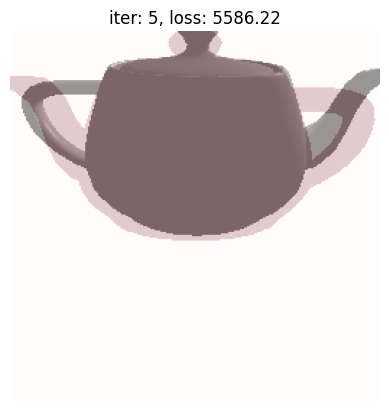

 28%|██▊       | 7/25 [01:39<04:24, 14.71s/it]

iteration: 6, loss: 4623.3701171875


 32%|███▏      | 8/25 [01:55<04:19, 15.24s/it]

iteration: 7, loss: 3381.7802734375


 36%|███▌      | 9/25 [02:12<04:10, 15.68s/it]

iteration: 8, loss: 3496.945068359375


 40%|████      | 10/25 [02:30<04:06, 16.43s/it]

iteration: 9, loss: 3731.32275390625


 40%|████      | 10/25 [02:49<04:06, 16.43s/it]

iteration: 10, loss: 3777.8759765625


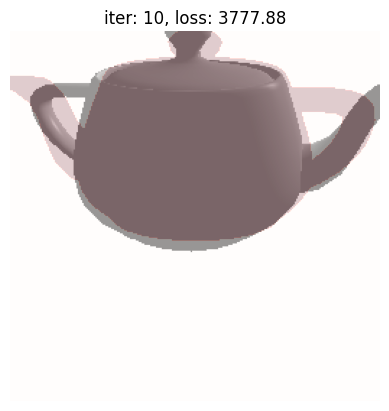

 48%|████▊     | 12/25 [03:08<03:52, 17.85s/it]

iteration: 11, loss: 3543.56298828125


 52%|█████▏    | 13/25 [03:27<03:38, 18.18s/it]

iteration: 12, loss: 3392.35107421875


 56%|█████▌    | 14/25 [03:46<03:20, 18.23s/it]

iteration: 13, loss: 3249.7724609375


 60%|██████    | 15/25 [04:04<03:02, 18.21s/it]

iteration: 14, loss: 3263.119873046875


 60%|██████    | 15/25 [04:22<03:02, 18.21s/it]

iteration: 15, loss: 3334.97314453125


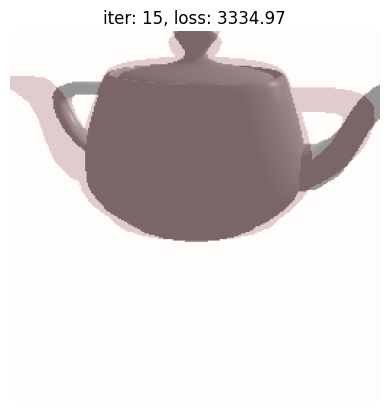

 68%|██████▊   | 17/25 [04:40<02:24, 18.06s/it]

iteration: 16, loss: 3399.74169921875


 72%|███████▏  | 18/25 [04:57<02:04, 17.85s/it]

iteration: 17, loss: 3469.468994140625


 76%|███████▌  | 19/25 [05:14<01:45, 17.60s/it]

iteration: 18, loss: 3451.054443359375


 80%|████████  | 20/25 [05:31<01:27, 17.52s/it]

iteration: 19, loss: 3348.583251953125


 80%|████████  | 20/25 [05:47<01:27, 17.52s/it]

iteration: 20, loss: 3026.544921875


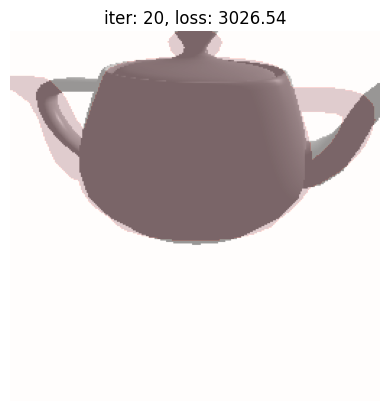

 88%|████████▊ | 22/25 [06:02<00:48, 16.23s/it]

iteration: 21, loss: 2863.712646484375


 92%|█████████▏| 23/25 [06:16<00:31, 15.76s/it]

iteration: 22, loss: 3095.117431640625


 96%|█████████▌| 24/25 [06:31<00:15, 15.43s/it]

iteration: 23, loss: 3151.490234375


100%|██████████| 25/25 [06:45<00:00, 16.24s/it]


iteration: 24, loss: 3070.760986328125


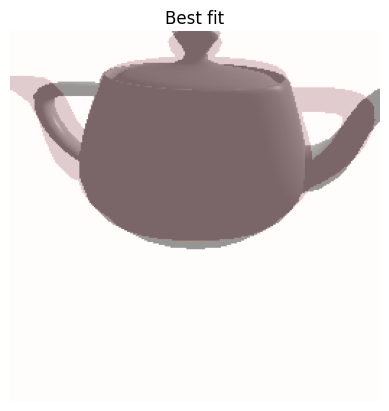

In [23]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 25, device)

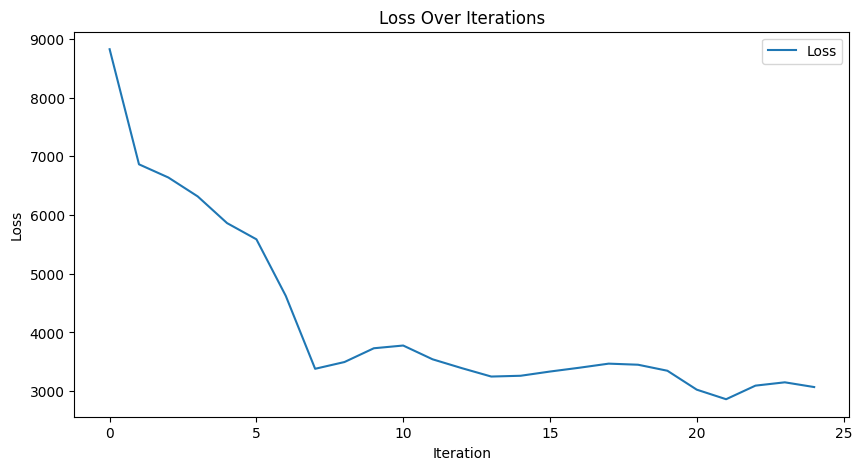

In [24]:
plot_losses(losses)

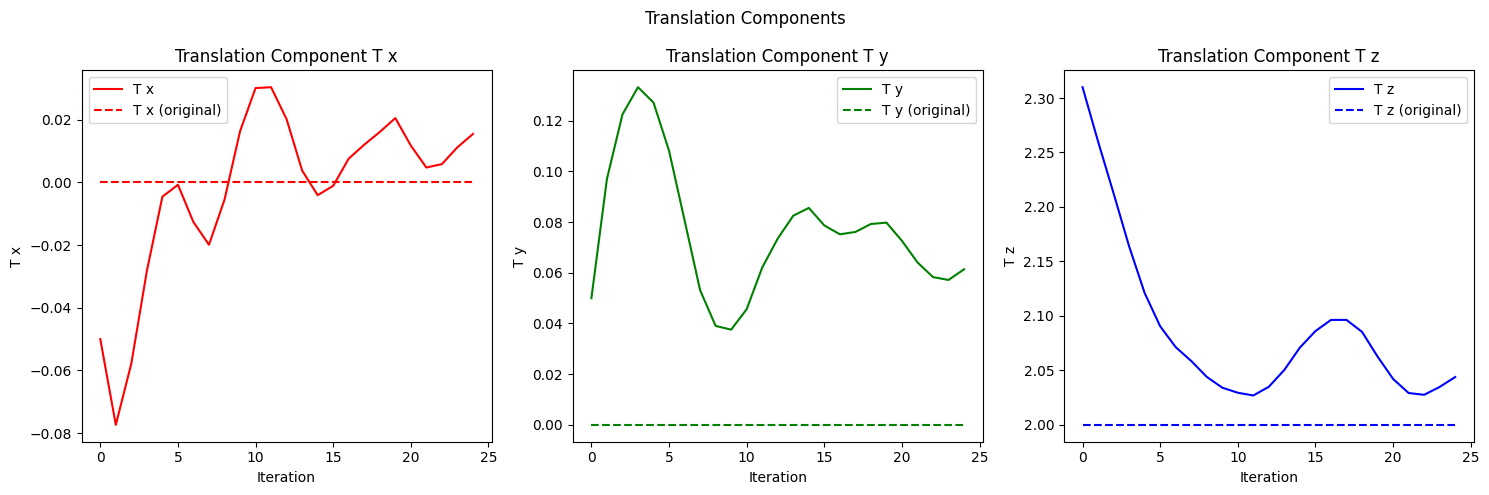

In [25]:
plot_translations(T_gt, parameter_updates)

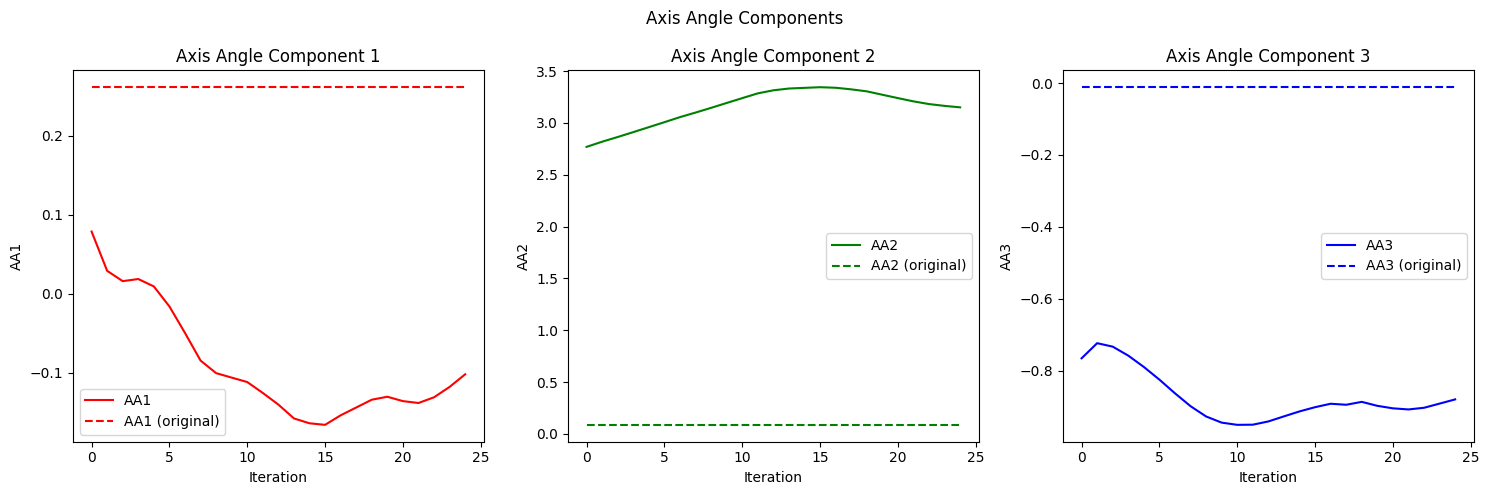

In [26]:
plot_axis_angles(R_gt, parameter_updates)

# 2. Bunny

In [32]:
bunny_path = "data/bunny.obj"
obj_name = bunny_path.split(".")[-2].split("/")[-1]
obj_name = obj_name
print("Loading", obj_name)
bunny_mesh = load_mesh(bunny_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading bunny


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


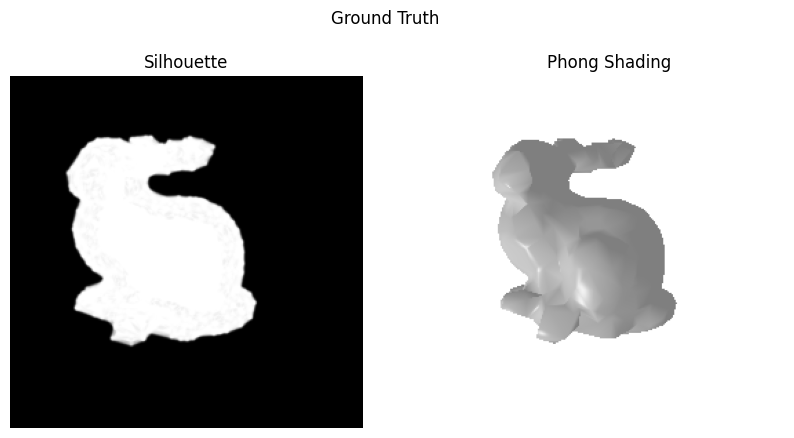

In [33]:
# Ground truth parameters

params = {
    "dist": -1.5,
    "elev": 270,
    "azim": 15
}

silhoutte_gt_bunny, phong_gt_bunny, R_gt, T_gt = get_ground_truth(bunny_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_bunny, phong_gt_bunny)

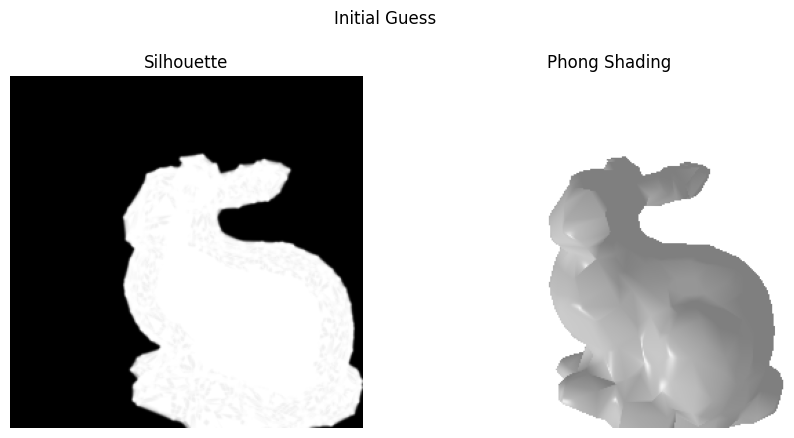

In [ ]:
variances = {
    "dist": 0,
    "elev": 0,
    "azim": 0.5
}

# # Initial guess for R and T
# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.5, device=device)

# # save R or(np.land T to a file
# np.save("data/bunny_R_init.npy", R_init.cpu().numpy())
# np.save("data/bunny_T_init.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/bunny_R_init.npy")).to(device)
T_init = torch.tensor(np.load("data/bunny_T_init.npy")).to(device)

plot_initial_guess(bunny_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

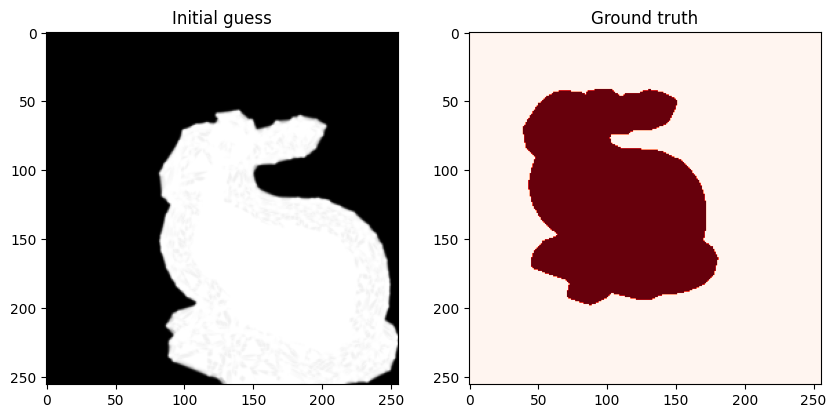

  0%|          | 0/30 [00:13<?, ?it/s]

iteration: 0, loss: 23034.728515625


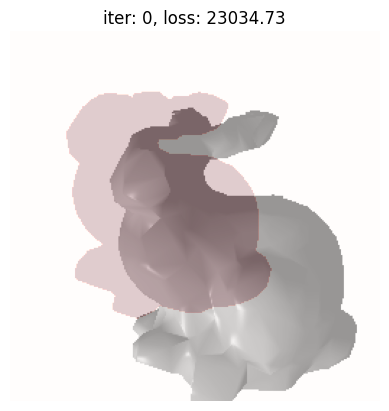

  7%|▋         | 2/30 [00:27<06:23, 13.71s/it]

iteration: 1, loss: 18903.58203125


 10%|█         | 3/30 [00:40<06:01, 13.40s/it]

iteration: 2, loss: 13865.9482421875


 13%|█▎        | 4/30 [00:53<05:40, 13.09s/it]

iteration: 3, loss: 9061.5625


 17%|█▋        | 5/30 [01:05<05:22, 12.89s/it]

iteration: 4, loss: 5455.681640625


 17%|█▋        | 5/30 [01:18<05:22, 12.89s/it]

iteration: 5, loss: 3345.36865234375


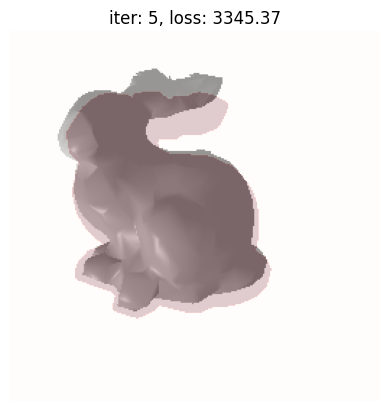

 23%|██▎       | 7/30 [01:30<04:47, 12.48s/it]

iteration: 6, loss: 3393.19091796875


 27%|██▋       | 8/30 [01:41<04:24, 12.02s/it]

iteration: 7, loss: 5798.1865234375


 30%|███       | 9/30 [01:51<04:03, 11.59s/it]

iteration: 8, loss: 4708.58251953125


 33%|███▎      | 10/30 [02:02<03:45, 11.29s/it]

iteration: 9, loss: 4070.34765625


 33%|███▎      | 10/30 [02:13<03:45, 11.29s/it]

iteration: 10, loss: 4133.29931640625


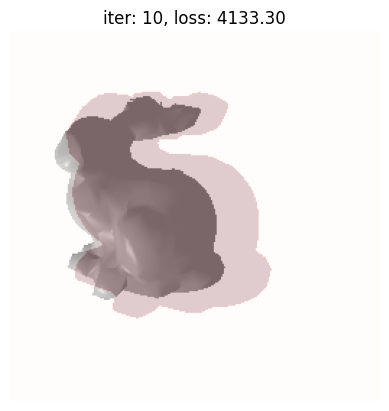

 40%|████      | 12/30 [02:23<03:15, 10.83s/it]

iteration: 11, loss: 6065.873046875


 43%|████▎     | 13/30 [02:33<02:57, 10.46s/it]

iteration: 12, loss: 6617.8759765625


 47%|████▋     | 14/30 [02:43<02:46, 10.40s/it]

iteration: 13, loss: 6954.3076171875


 50%|█████     | 15/30 [02:53<02:34, 10.28s/it]

iteration: 14, loss: 7038.259765625


 50%|█████     | 15/30 [03:02<02:34, 10.28s/it]

iteration: 15, loss: 10181.8359375


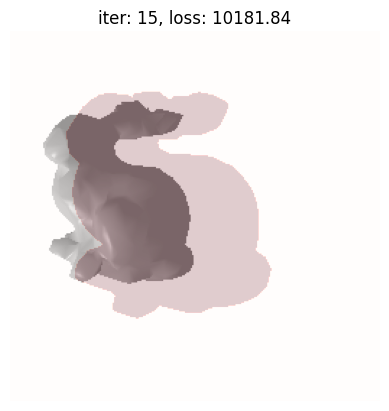

 57%|█████▋    | 17/30 [03:12<02:09,  9.93s/it]

iteration: 16, loss: 9683.6767578125


 60%|██████    | 18/30 [03:21<01:57,  9.75s/it]

iteration: 17, loss: 9059.337890625


 63%|██████▎   | 19/30 [03:31<01:46,  9.66s/it]

iteration: 18, loss: 8397.1533203125


 67%|██████▋   | 20/30 [03:40<01:35,  9.57s/it]

iteration: 19, loss: 7859.61767578125


 67%|██████▋   | 20/30 [03:50<01:35,  9.57s/it]

iteration: 20, loss: 7469.31640625


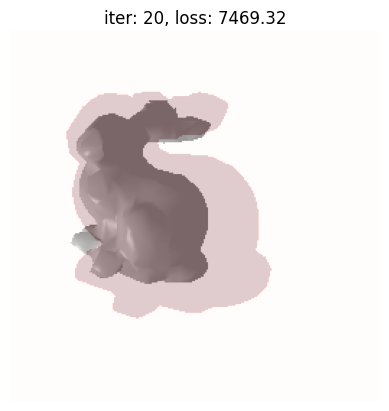

 73%|███████▎  | 22/30 [04:00<01:17,  9.65s/it]

iteration: 21, loss: 7361.890625


 77%|███████▋  | 23/30 [04:09<01:06,  9.52s/it]

iteration: 22, loss: 7276.3505859375


 80%|████████  | 24/30 [04:18<00:56,  9.34s/it]

iteration: 23, loss: 8199.5009765625


 83%|████████▎ | 25/30 [04:28<00:47,  9.47s/it]

iteration: 24, loss: 8017.173828125


 83%|████████▎ | 25/30 [04:37<00:47,  9.47s/it]

iteration: 25, loss: 7787.0205078125


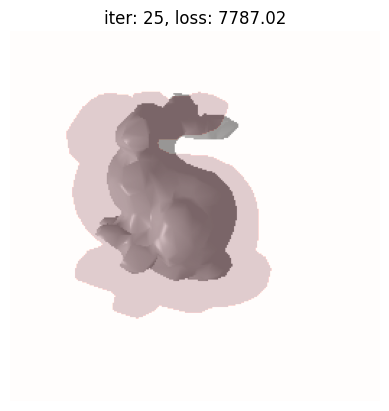

 90%|█████████ | 27/30 [04:46<00:28,  9.44s/it]

iteration: 26, loss: 7554.59521484375


 93%|█████████▎| 28/30 [04:57<00:19,  9.68s/it]

iteration: 27, loss: 7280.6962890625


 97%|█████████▋| 29/30 [05:07<00:09,  9.79s/it]

iteration: 28, loss: 6960.6396484375


100%|██████████| 30/30 [05:17<00:00, 10.59s/it]


iteration: 29, loss: 6653.3818359375


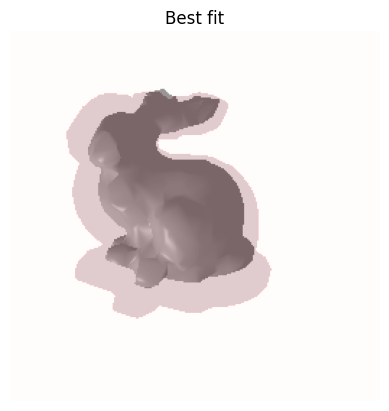

In [47]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(bunny_mesh, silhoutte_gt_bunny, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 30, device)

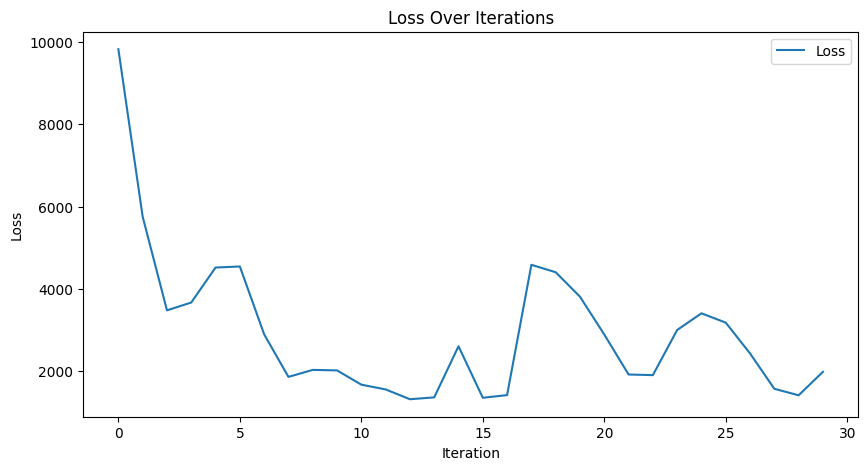

In [16]:
plot_losses(losses)

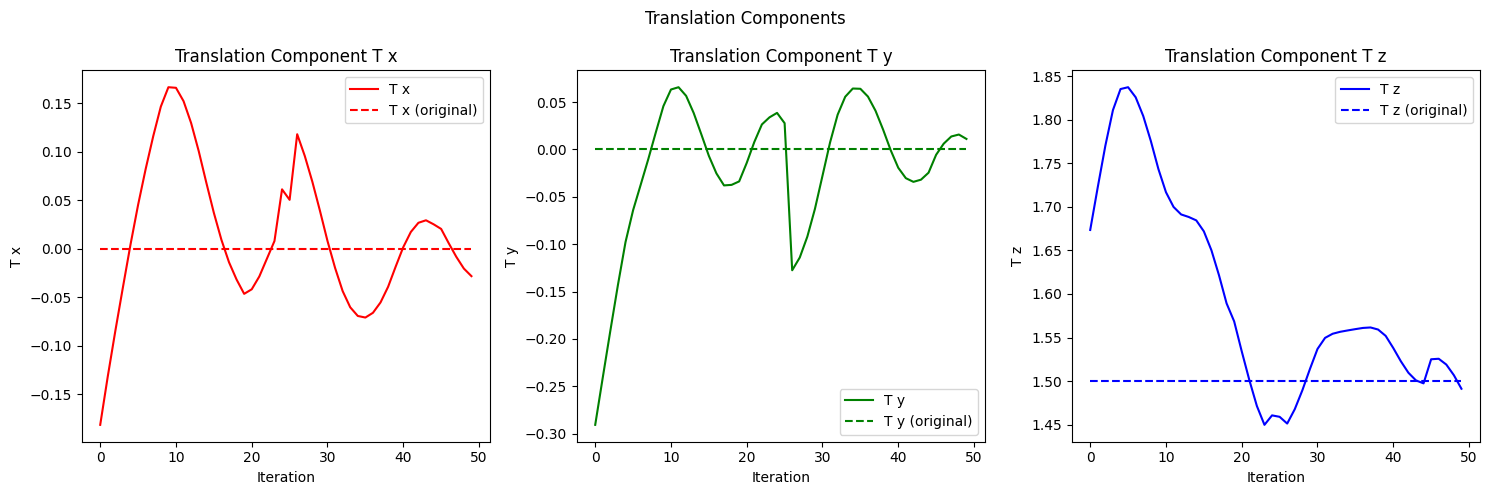

In [9]:
plot_translations(T_gt, parameter_updates)

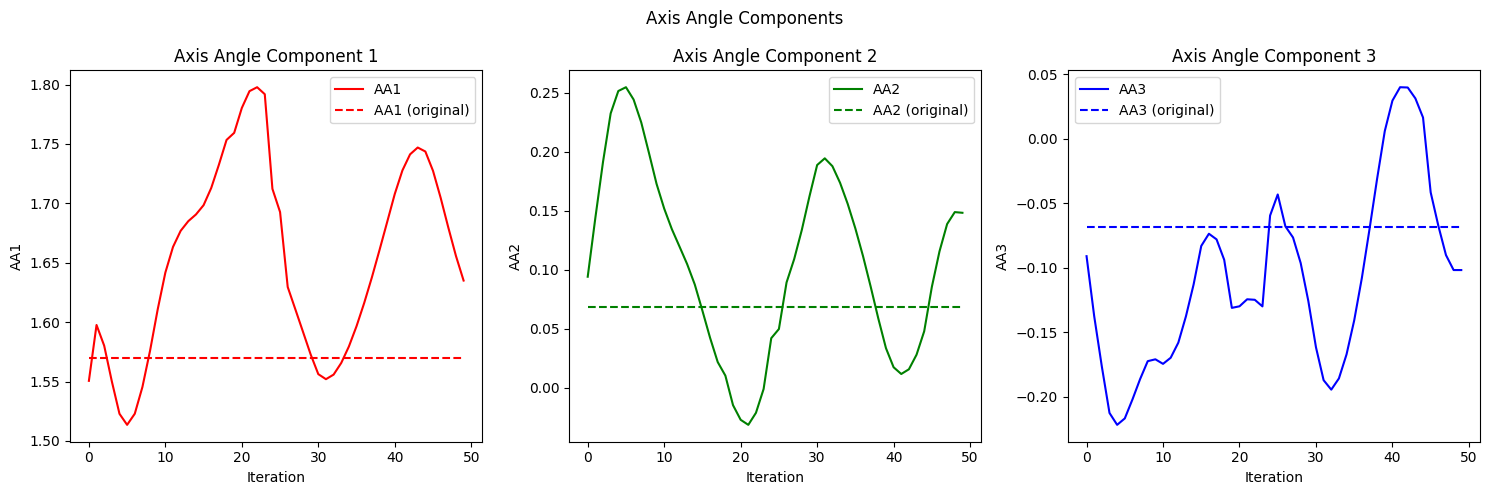

In [10]:
plot_axis_angles(R_gt, parameter_updates)